<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT (EDA)
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [1]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:BoJaviNAFdNXrZL+1Gh53nEEXsHhQULaxLfZGaGu2Lc root@3a360f53b881
The key's randomart image is:
+---[RSA 4096]----+
|   +o   ... o+o*+|
|  .... .   .+o+=.|
| .o . o . ...o+.*|
|.+   . + .  .. =.|
|o .   . S +  ..  |
|.  .   o =oo.. . |
|. o     +.oo..o  |
| . .     . ....  |
|             E   |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [2]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-10d0a39d


In [3]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDEBVpgheFflcmWIPUoLDsPhWiAYP/KCvvTGsPf0LU0zVjRd6YxImNeN4qEN0OiJmZQhBaqDoYmVmaoCcTkXY/D/H29jTwJvBjNTseiFrEYDIja9st9ALxg7JLo5MuogJZYyoUajvywl1UHcf3BQhIFtG1zilrjMGl4ECR/di62rZE9WN8BTM7Le3896bKAqOnUYAlplsIY7qyJPNfxdyadzI70tuaOharD2keuovSjCQDkqHxJUPW7oTTyEoeF3hBhCMl9lvwL+7+icFHEY3DuX9Js0b9osQUOZl7r5qYS9cvk0FMmzvBWV1JNRLaUQtSMHpW9R36RJnr2ptcpljfzpa0DVjWSNgz5Pw59ZpRz64BSOpRORWib/lCsOaJ0/L8yv48y6Hi+wkWYp1Xp9v3GBVtU1z6z9h+xX4cO9Qua6hxi9YV8bT4gIY2RZrdv+nYdnsYAHoCpOjdJRXCKpMlcernjIJbkIXnVbrhEnDsnU/HWN+pNQuoj+PAXsB5lxZ1ZEhFcUAyL41bk6RKLEG1lE9tqJNVUO2+qungxeGaLw48TZ0+Qbceskf+BibjS/RXdTb9LiWUy/sXtZQi1NOxHAfb/j0QYTNZvhVeWxmA/J5ehtWIr/ymjLtRWUDDQrOO4U/RsVlcVbxRU2eTeSkEbbwCtLLeksLllOhbFhA+SLQ== root@3a360f53b881


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [4]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [5]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 46 (delta 14), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 264.49 KiB | 605.00 KiB/s, done.
Resolving deltas: 100% (14/14), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [10]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [11]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# install necessary libraries that might not be found
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_trf

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 1.6MB 5.6MB/s 
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (56.0.0)
Requirement already up-to-date: wheel in /usr/local/lib/python3.7/dist-packages (0.36.2)
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 28.0 MB 115 kB/s 
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052145 sha256=9b985da5d99288b25c59c4b853922aad2751ceafc8cc3e3dabef0b7187a91e4c
  Stored in directory: /root/.cache/pip/wheels/b6/09/83/36dd0224ce32dcdf5e218b36362235ca2e50cece60a966ae1b
Successfully built spacy-lookups-data

✘ No compatible model found for 'en_core_web_trf' (spaCy v2.2.4).

************************
        Versions        
************************
Tensorflow version=2.4.1
Keras version=2.4.0
Sklearn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Seabor

### 2.2. Load the modules

---

Load the necessary modules for usage in the entire project.

In [ ]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# configurate spacy settings
nlp = spacy.load("en")








# we need these spacy modules to do data cleansing
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2.3. Load the dataset

---

Load the dataset for usage in the entire project.

In [ ]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./Company_Dataset_Batch1.3_TRIAL.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,6659723700627433472,ANDERCO PTE LTD,SINGAPORE,NaN,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,http://www.anderco.com.sg/our-products/project...,We specialize in design and building from dorm...,NaN
1,6856115970005237760,WEC ENGINEERS & CONSTRUCTORS PTE LTD,SINGAPORE,NaN,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,http://www.wec.com.sg/about.html,We have transformed ourselves into a specialis...,NaN
2,7369198031907269632,ECHO PORT INTERNATIONAL LIMITED,HONG KONG,NaN,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,https://www.made-in-china.com/showroom/echo-port,Echo Port is specialized in manufacturing CHES...,NaN
3,2902596962999106048,"DEKORAMIK PERDANA,PT",INDONESIA,NaN,CNI,building material,building material_distributor,DOWNSTREAM,http://www.sandimas.co.id/en/about,"Sandimas provides a wide range of commercial, ...",NaN
4,4869680436385200128,ELCA CONTRACT FLOORING PTE LTD,SINGAPORE,NaN,CNI,building material,building material_distributor,DOWNSTREAM,http://www.elca.com.sg/,Elca Contract Flooring Pte Ltd established in ...,NaN
5,2833793606053527552,"SYNNEX (THAILAND) PUBLIC CO., LTD.",THAILAND,NaN,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,https://www.synnex.co.th/th/about/business.aspx,"The Company distributes computers, computer pe...",NaN
6,815115935851177472,CAPPITECH ENGINEERING PTE LTD,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,https://sgpgrid.com/company-details/cappitech-...,CAPPITECH ENGINEERING is an ACRA-registered en...,NaN
7,7375353431500220416,CE-TEST AND MEASUREMENT (S) PTE LTD,SINGAPORE,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.cetm.com.sg/content/4-about-us,"In the year 2002, we formed a strategic allian...",NaN
8,5322820782371812352,QUEL INTERNATIONAL SDN BHD,MALAYSIA,NaN,CNI,building material,building material_distributor,DOWNSTREAM,https://www.quelfurniture.com/about-us,Commemorating 10 solid years of providing furn...,NaN
9,1059731912908073216,NALURI PERINTIS SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNABLE TO LOCATE COMPANY


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [ ]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [ ]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].count()

# get count of total sectors where companies are from
df_countSector = companies['Sector'].count()

# get count of total subseector where companies are from
df_countsubSector = companies['Subsector'].count()

# get count of total valuechain where companies are from
df_countValuechain = companies['Valuechain'].count()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 400
Total number of countries: 400
Total number of sectors: 379
Total number of subsectors: 379
Total number of valuechain: 343


In [ ]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE    172
MALAYSIA      89
THAILAND      72
CHINA         33
HONG KONG     20
INDONESIA     14
Name: Country, dtype: int64

List of unique sector:
CNI    164
TMT    121
OOS     33
ONG     32
REH     11
IND      9
CG       9
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 208
DOWNSTREAM                 93
UPSTREAM                   26
ACROSS VALUE CHAIN          5
UPSTREAM OR DOWNSTREAM      4
DISTRIBUTOR                 2
MANUFACTURER                2
TRADER                      1
Downstream                  1
Upstream                    1
Name: Valuechain, dtype: int64


In [ ]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
buildings & industrial               61
building material                    48
consumer electronics                 45
others                               33
it services                          29
cni_service providers                29
semiconductor                        19
o&g                                  14
digital_business                     12
utilities                            12
telecommunication                     9
petrochemical                         8
retail n distribution                 7
o&g_service providers/contractors     7
media                                 7
infrastructure                        6
cni_equipment suppliers               6
commercial                            5
metals and mining                     5
auto & mec                            4
mixed                                 3
residential                           2
ioc                                   2
fmcg                                  1
agribusiness  

In [ ]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
buildings & industrial_contractor                              60
consumer electronics_distributor                               39
others                                                         33
building material_manufacturer                                 32
it services                                                    29
cni_service providers                                          29
building material_supplier_distributor                         14
digital_business                                               12
electronics components/semiconductor_component distributor     10
electronics components/semiconductor_component manufacturer     9
o&g_distributor                                                 8
utilities_developer                                             7
o&g_retail outlet                                               6
content creator                                                 6
cni_equipment suppliers                           

### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [ ]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,ANDERCO PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,We specialize in design and building from dorm...
1,WEC ENGINEERS & CONSTRUCTORS PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,We have transformed ourselves into a specialis...
2,ECHO PORT INTERNATIONAL LIMITED,HONG KONG,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,Echo Port is specialized in manufacturing CHES...
3,"DEKORAMIK PERDANA,PT",INDONESIA,CNI,building material,building material_distributor,DOWNSTREAM,"Sandimas provides a wide range of commercial, ..."
4,ELCA CONTRACT FLOORING PTE LTD,SINGAPORE,CNI,building material,building material_distributor,DOWNSTREAM,Elca Contract Flooring Pte Ltd established in ...
...,...,...,...,...,...,...,...
395,"HENAN ZHONGYUAN HEAVY FORGING CO., LTD",CHINA,IND,metals and mining,steel fabricator,MANUFACTURER,"Henan Zhongyuan Heavy Forging Co., Ltd. was fo..."
396,ZHANGZHOU SANLIDA ENVIRONMENTAL TECHNOLOGY COR...,CHINA,OOS,others,others,NaN,Industry:\nPulp & Paper Mills\nManufacturing S...
397,山西平阳煤机装备有限责任公司,CHINA,IND,auto & mec,mec oem dealer,MIDSTREAM,"Processing, sales, installation and maintenanc..."
398,SUNRIGHT LTD,SINGAPORE,OOS,others,others,NaN,"Sunright Limited, a main board listed company ..."


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [ ]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
9,NALURI PERINTIS SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
12,"CAKRATAMA KRESNA BUANA,PT",INDONESIA,NaN,NaN,NaN,NaN,NaN
23,AIRCO LIMITED,THAILAND,NaN,NaN,NaN,NaN,NaN
46,TOWER HOPE LIMITED,SINGAPORE,NaN,NaN,NaN,NaN,NaN
99,QF NEAR TECHNOLOGY (TIAN JIN) CORP.,CHINA,NaN,NaN,NaN,NaN,NaN
125,SYS-MCD (SPJ) JOINT VENTURE,MALAYSIA,NaN,NaN,NaN,NaN,NaN
199,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
268,"THE CONSORTIUM OF UAHWATANASAKUL CO.,LTD.AND P...",THAILAND,NaN,NaN,NaN,NaN,NaN
293,RAINBOW BLISS LIMITED,SINGAPORE,NaN,NaN,NaN,NaN,NaN
324,"HOME SANITARYWARE CO.,LTD.",THAILAND,NaN,NaN,NaN,NaN,NaN


In [ ]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,ANDERCO PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,We specialize in design and building from dorm...
1,WEC ENGINEERS & CONSTRUCTORS PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,We have transformed ourselves into a specialis...
2,ECHO PORT INTERNATIONAL LIMITED,HONG KONG,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,Echo Port is specialized in manufacturing CHES...
3,"DEKORAMIK PERDANA,PT",INDONESIA,CNI,building material,building material_distributor,DOWNSTREAM,"Sandimas provides a wide range of commercial, ..."
4,ELCA CONTRACT FLOORING PTE LTD,SINGAPORE,CNI,building material,building material_distributor,DOWNSTREAM,Elca Contract Flooring Pte Ltd established in ...
...,...,...,...,...,...,...,...
395,"HENAN ZHONGYUAN HEAVY FORGING CO., LTD",CHINA,IND,metals and mining,steel fabricator,MANUFACTURER,"Henan Zhongyuan Heavy Forging Co., Ltd. was fo..."
396,ZHANGZHOU SANLIDA ENVIRONMENTAL TECHNOLOGY COR...,CHINA,OOS,others,others,NaN,Industry:\nPulp & Paper Mills\nManufacturing S...
397,山西平阳煤机装备有限责任公司,CHINA,IND,auto & mec,mec oem dealer,MIDSTREAM,"Processing, sales, installation and maintenanc..."
398,SUNRIGHT LTD,SINGAPORE,OOS,others,others,NaN,"Sunright Limited, a main board listed company ..."


In [ ]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 383


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

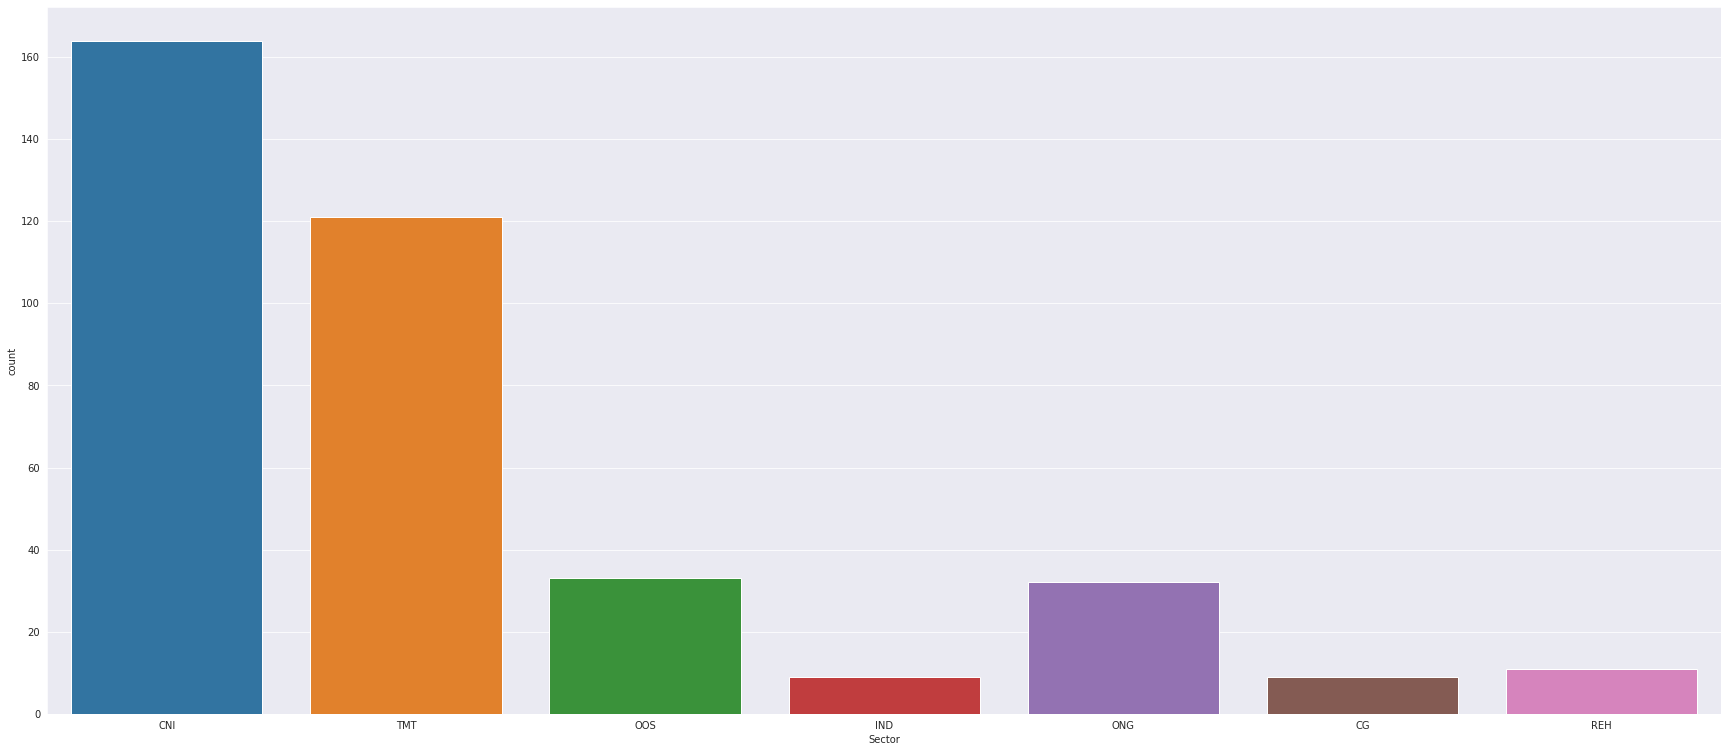

In [ ]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

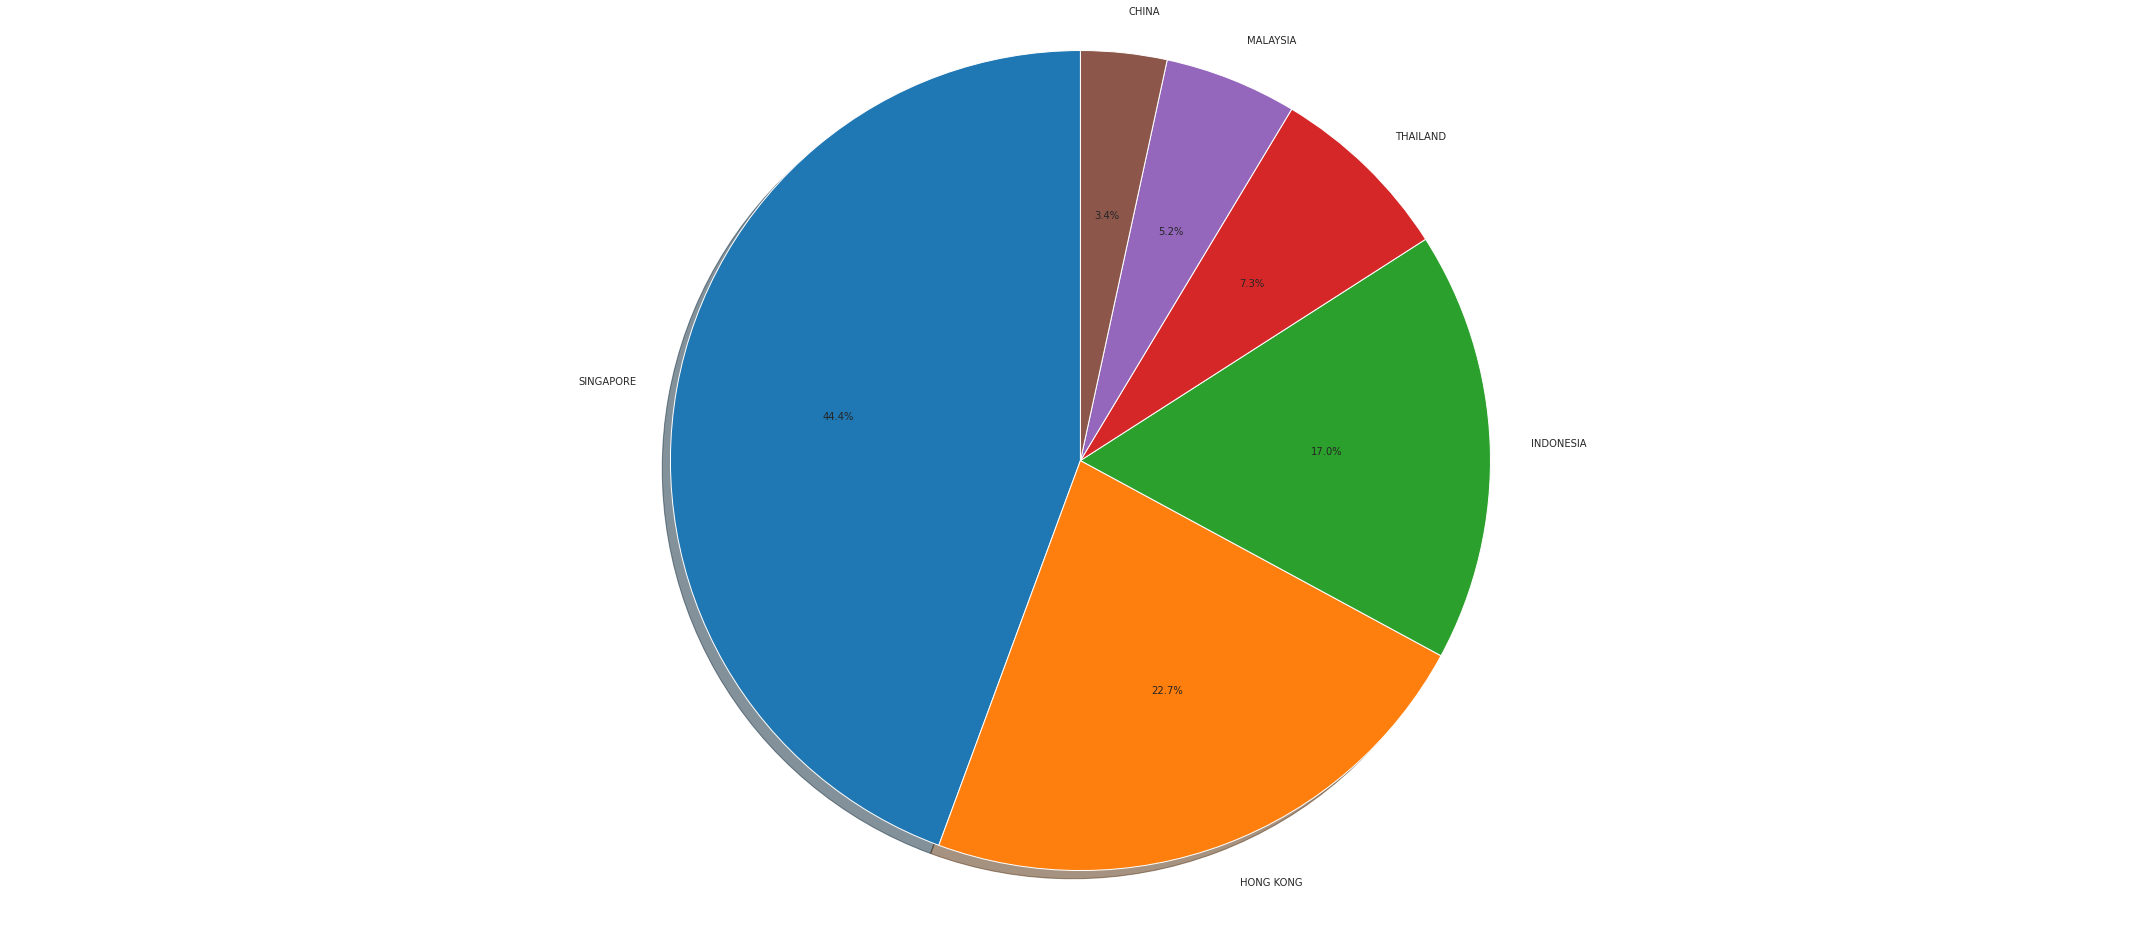

In [ ]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [ ]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                              We specialize in design and building from dormitories including ancillary facilities and amenities such as central kitchen, supermarket, cinema and recreation facilities to temporary offices for a wide range of purposes and site office for projects to clients requirements and specifications in a short duration. Our architect can utilize limited land area to maximize built-up space with a up building design with access by our steel stair system. We also provide prefabricated buildings for hospitals and polyclinics providing addition

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [ ]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                              We specialize in design and building from dormitories including ancillary facilities and amenities such as central kitchen, supermarket, cinema and recreation facilities to temporary offices for a wide range of purposes and site office for projects to clients requirements and specifications in a short duration. Our architect can utilize limited land area to maximize built-up space with a up building design with access by our steel stair system. We also provide prefabricated buildings for hospitals and polyclinics providing addition

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [ ]:
# first, add in a new column that tabluates the length of the respecive copany description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,ANDERCO PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,"We specialize in design and building from dormitories including ancillary facilities and amenities such as central kitchen, supermarket, cinema and recreation facilities to temporary offices for a wide range of purposes and site office for projects to clients requirements and specifications in a short duration. Our architect can utilize limited land area to maximize built-up space with a up building design with access by our steel stair system. We also provide prefabricated buildings for hospitals and polyclinics providing additional spaces for offices, consultation rooms, treatment room, patient beds, etc. Our solutions to your well-designed quality temporary housing and facilities: Dormitory, Site Office, Hospital, Schools and classrooms, Sales Office",763.0
1,WEC ENGINEERS & CONSTRUCTORS PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,"We have transformed ourselves into a specialist provider of EPCC (Engineering, Procurement, Construction and Commissioning) services for aviation fuel facilities, infrastructure projects and plant engineering works which includes but not limited to, the transmission and storage of commodities, such as oil, gas, water. Our services encompass the full spectrum of engineering works from engineering design, sourcing and procurement, construction, fabrication, installation, testing and commissioning. We also possess the expertise to phase and integrate new systems with existing facilities such that existing operations are not disrupted whilst works are being carried out. In addition, we provide maintenance services to our customers for their existing infrastructure facilities. We are also involved in the engineering works for specialized projects such as offshore facilities for oil and gas production and petrochemical plants. These projects require high engineering expertise where our engineering knowledge and construction experience are applied. Thus far, our involvement in such projects has been in relation to specific engineering steps such as engineering design, installation, testing and commissioning.",1220.0
2,ECHO PORT INTERNATIONAL LIMITED,HONG KONG,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Echo Port is specialized in manufacturing CHEST FREEZER, SHOWCASE & REFRIGERATOR. Being professional for this field, we offer full range OEM products for well-known enterprises in domestic and export market. With our competitive price and excellent quality, we have sucessfully been the long term supplier of some famous brands in the world, such as SANYO, AKIRA, AKAI etc. The annual production capacity has reached 600, 000 units.",432.0
3,"DEKORAMIK PERDANA,PT",INDONESIA,CNI,building material,building material_distributor,DOWNSTREAM,"Sandimas provides a wide range of commercial, industrial and residential building supplies specializing in floor tiles & sanitary wares related products. Since 1987, Sandimas has built its reputation to be the trusted importer & distributor of high quality granite tiles in Indonesia. Sandimas continuously advances its quality, skill and innovation, leading the company into dominant market position today.",407.0
4,ELCA CONTRACT FLOORING PTE LTD,SINGAPORE,CNI,building material,building material_distributor,DOWNSTREAM,"Elca Contract Flooring Pte Ltd established in 1987 and Elca Design Pte Ltd (a subsidiary of Elca Contract Flooring.) are the sole distributor for Tarkett vinyl and Flotex floorcoverings, providing both sales and installation; and after sales services in Singapore.",264.0


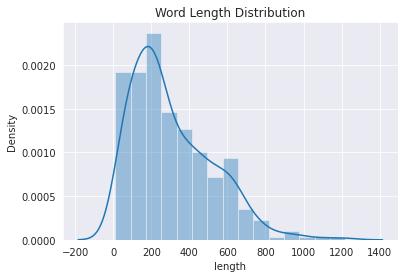

In [ ]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [ ]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 383

# now we will get the data from the restricted range of sample size
subsample = df_valid[:383]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,ANDERCO PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,"We specialize in design and building from dormitories including ancillary facilities and amenities such as central kitchen, supermarket, cinema and recreation facilities to temporary offices for a wide range of purposes and site office for projects to clients requirements and specifications in a short duration. Our architect can utilize limited land area to maximize built-up space with a up building design with access by our steel stair system. We also provide prefabricated buildings for hospitals and polyclinics providing additional spaces for offices, consultation rooms, treatment room, patient beds, etc. Our solutions to your well-designed quality temporary housing and facilities: Dormitory, Site Office, Hospital, Schools and classrooms, Sales Office",763.0
1,WEC ENGINEERS & CONSTRUCTORS PTE LTD,SINGAPORE,CNI,buildings & industrial,buildings & industrial_contractor,MIDSTREAM,"We have transformed ourselves into a specialist provider of EPCC (Engineering, Procurement, Construction and Commissioning) services for aviation fuel facilities, infrastructure projects and plant engineering works which includes but not limited to, the transmission and storage of commodities, such as oil, gas, water. Our services encompass the full spectrum of engineering works from engineering design, sourcing and procurement, construction, fabrication, installation, testing and commissioning. We also possess the expertise to phase and integrate new systems with existing facilities such that existing operations are not disrupted whilst works are being carried out. In addition, we provide maintenance services to our customers for their existing infrastructure facilities. We are also involved in the engineering works for specialized projects such as offshore facilities for oil and gas production and petrochemical plants. These projects require high engineering expertise where our engineering knowledge and construction experience are applied. Thus far, our involvement in such projects has been in relation to specific engineering steps such as engineering design, installation, testing and commissioning.",1220.0
2,ECHO PORT INTERNATIONAL LIMITED,HONG KONG,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Echo Port is specialized in manufacturing CHEST FREEZER, SHOWCASE & REFRIGERATOR. Being professional for this field, we offer full range OEM products for well-known enterprises in domestic and export market. With our competitive price and excellent quality, we have sucessfully been the long term supplier of some famous brands in the world, such as SANYO, AKIRA, AKAI etc. The annual production capacity has reached 600, 000 units.",432.0
3,"DEKORAMIK PERDANA,PT",INDONESIA,CNI,building material,building material_distributor,DOWNSTREAM,"Sandimas provides a wide range of commercial, industrial and residential building supplies specializing in floor tiles & sanitary wares related products. Since 1987, Sandimas has built its reputation to be the trusted importer & distributor of high quality granite tiles in Indonesia. Sandimas continuously advances its quality, skill and innovation, leading the company into dominant market position today.",407.0
4,ELCA CONTRACT FLOORING PTE LTD,SINGAPORE,CNI,building material,building material_distributor,DOWNSTREAM,"Elca Contract Flooring Pte Ltd established in 1987 and Elca Design Pte Ltd (a subsidiary of Elca Contract Flooring.) are the sole distributor for Tarkett vinyl and Flotex floorcoverings, providing both sales and installation; and after sales services in Singapore.",264.0
...,...,...,...,...,...,...,...,...
395,"HENAN ZHONGYUAN HEAVY FORGING CO., LTD",CHINA,IND,metals and mining,steel fabricator,MANUFACTURER,"Henan Zhongyuan Heavy Forging Co., Ltd. was founded in 2004. The company's line of business includes t

### 4.4. Lower casing

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous.

In [ ]:
# text tokenization
df_valid['tokenized'] = df_valid['Company Profile Information'].apply(word_tokenize)

# create a new column called clean which 
df_valid[['tokenized']]

---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)




